In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.datasets import load_breast_cancer
raw_data=load_breast_cancer()
df=pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df['target']=raw_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='target', ylabel='count'>

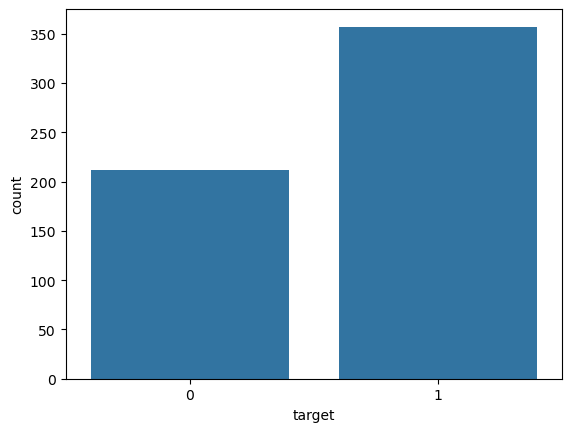

In [25]:
sns.countplot(x='target', data=df)

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop('target', axis=1)
y=df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9649122807017544


<Axes: >

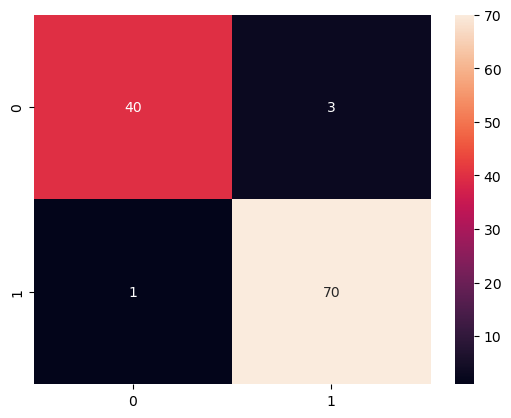

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. On calcule le tableau des erreurs
cm = confusion_matrix(y_test, predictions)

# 2. On le dessine
sns.heatmap(cm, annot=True, fmt='d')

In [32]:
# On invente les mesures d'une tumeur (on prend juste la première ligne du test pour l'exemple)
nouveau_patient = X_test.iloc[0]

# On demande à l'IA de prédire (Attention aux doubles crochets, c'est technique)
prediction = model.predict([nouveau_patient])

print(prediction)
# Si ça affiche [0] -> Cancer. Si ça affiche [1] -> Sain.

[1]


C:\Users\anoua\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
verite = y_test.iloc[0]
print(verite)
# Si ça affiche 1, l'IA a eu raison. Si ça affiche 0, l'IA s'est trompée.

1


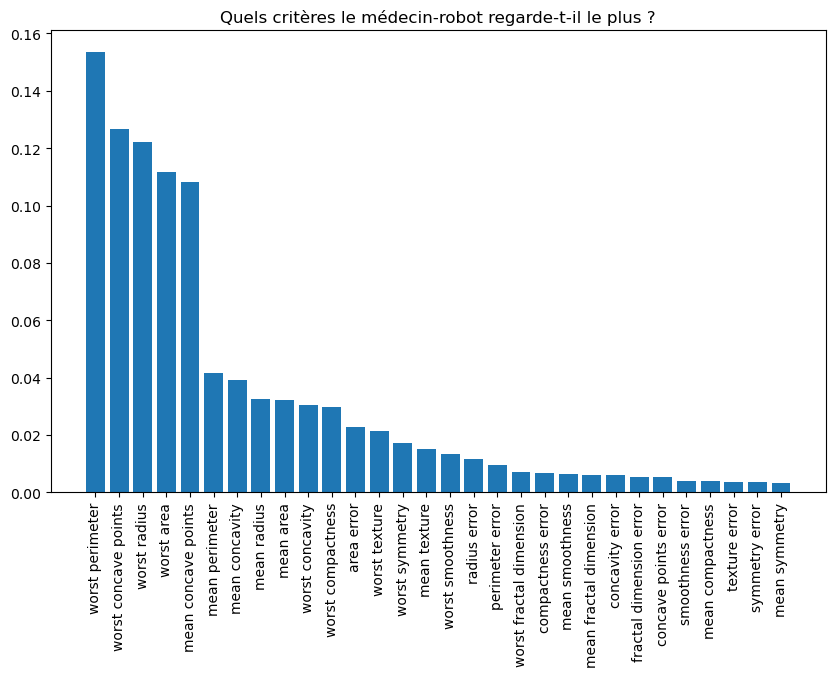

In [34]:
# On récupère l'importance de chaque critère (c'est des % calculés par la forêt)
importances = model.feature_importances_

# On crée un graphique pour visualiser ça
indices = np.argsort(importances)[::-1] # On trie du plus grand au plus petit
plt.figure(figsize=(10, 6))
plt.title("Quels critères le médecin-robot regarde-t-il le plus ?")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), df.columns[indices], rotation=90)
plt.show()